## Student Name: Kanashima Hatsumi
## Student ID: 1004429

## Excercise 1

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data.csv into pandas
data = pd.read_csv('./data.csv', names=["x","y"])
x = data["x"].to_numpy()
y = data["y"].to_numpy()

### Normal Equation

In [3]:
def normal_equation(X, Y):
    n = len(X)
    Y_bar = np.sum(Y)/n
    X_bar = np.sum(X)/n
    
    B = np.sum((X*Y) - (Y_bar*X)) / np.sum(X**2 - (X_bar*X))
    a = Y_bar - (B*X_bar)
    Y_pred = (B * X) + a
    print(f"a={a} , B={B}")
    print(f"Normal Equation: Y = {B}x + {a}")
    return Y_pred

a=7.991020982270655 , B=1.3224310227553546
Normal Equation: Y = 1.3224310227553546x + 7.991020982270655


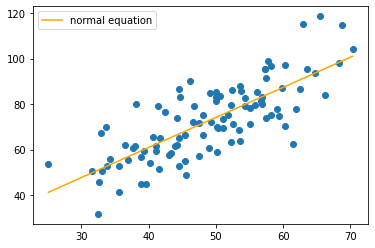

In [4]:
normal_eqn = normal_equation(x,y)

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(normal_eqn), max(normal_eqn)], color='orange', label = 'normal equation')  # regression line
plt.legend()
plt.show()

### With Gradient Descent

In [5]:
def gradient_descent(X, Y, lr, epochs):
    n = len(X)
    m = 0
    c = 0

    for epoch in range(epochs):
        old_m = m
        old_c = c
        Y_pred = (m * X) + c
        Dm = -2/n * np.sum((Y - Y_pred) * X)
        Dc = -2/n * np.sum(Y - Y_pred)
        m -= (lr * Dm)
        c -= (lr * Dc)
        print(f"Epoch {epoch}: m={m} , c={c}")
        if abs(m - old_m) < 0.0001 and abs(c - old_c) < 0.0001:
            break
    print(f"\nFinal: m={m} , c={c}")
    return Y_pred

Epoch 0: m=0.7370702973591055 , c=0.014547010110737293
Epoch 1: m=1.1067954543515157 , c=0.021873962959596403
Epoch 2: m=1.2922546649131115 , c=0.02557922432129313
Epoch 3: m=1.3852832556512449 , c=0.02746778955914435
Epoch 4: m=1.4319472323843203 , c=0.028445071981738956
Epoch 5: m=1.4553540088980408 , c=0.028965240766478613
Epoch 6: m=1.4670946177201354 , c=0.029256114126046694
Epoch 7: m=1.4729832982243762 , c=0.029431969163807123
Epoch 8: m=1.4759365618962286 , c=0.029550129024383066
Epoch 9: m=1.4774173755483797 , c=0.029639347874732384
Epoch 10: m=1.4781595857319891 , c=0.02971404924522704
Epoch 11: m=1.4785313011122556 , c=0.029781468199526515
Epoch 12: m=1.4787171706313593 , c=0.02984523395633241
Epoch 13: m=1.4788098170256598 , c=0.029907166987310232

Final: m=1.4788098170256598 , c=0.029907166987310232


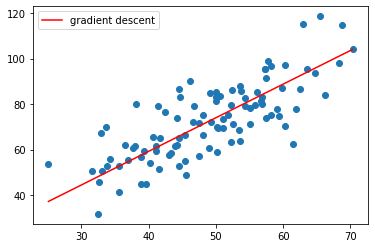

In [6]:
gd = gradient_descent(x,y,0.0001,100)

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(gd), max(gd)], color='red', label = 'gradient descent')  
plt.legend()
plt.show()

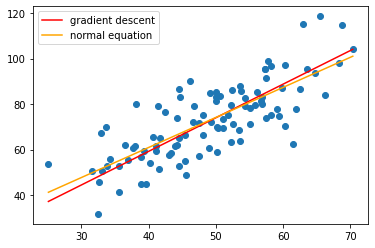

In [7]:
plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(gd), max(gd)], color='red', label = 'gradient descent')  # regression line
plt.plot([min(x), max(x)], [min(normal_eqn), max(normal_eqn)], color='orange', label = 'normal equation')  # regression line
plt.legend()
plt.show()


## Excercise 2

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Read chicago_hotel_reviews.csv file
df = pd.read_csv('./chicago_hotel_reviews.csv')

# Split the data into 80% train and 20% test.
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:3], df['rating'], test_size=0.2)

# Extract "Review" feature
getReview = FunctionTransformer(lambda x: x['review'], validate=False)

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_wm = tfidf_vectorizer.fit_transform(x_train['review'])
tfidf_tokens = tfidf_vectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("TD-IDF Vectorizer\n")
print(df_tfidfvect)

TD-IDF Vectorizer

           00  000   08   09        10  100  105  10k  10min  10x  ...  years  \
0    0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
1    0.000000  0.0  0.0  0.0  0.067043  0.0  0.0  0.0    0.0  0.0  ...    0.0   
2    0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
3    0.000000  0.0  0.0  0.0  0.161955  0.0  0.0  0.0    0.0  0.0  ...    0.0   
4    0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
..        ...  ...  ...  ...       ...  ...  ...  ...    ...  ...  ...    ...   
120  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
121  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
122  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
123  0.122586  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   
124  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0    0.0  0.0  ...    0.0   

     yel

In [11]:
pipeline = Pipeline(steps=[('review', getReview), ('tfidf_vect', tfidf_vectorizer), ('linear_reg', LinearRegression())])
print(pipeline)
pipeline.fit(x_train, y_train)

predicted = pipeline.predict(x_test)
print("\nMean Squared Error: ", mean_squared_error(y_test, predicted))

Pipeline(steps=[('review',
                 FunctionTransformer(func=<function <lambda> at 0x133d7f280>)),
                ('tfidf_vect', TfidfVectorizer(stop_words='english')),
                ('linear_reg', LinearRegression())])

Mean Squared Error:  0.7393079945872163


### Similar Pipeline with Feature Selection

In [12]:
feature_selection = SelectPercentile(f_regression, percentile=10)
pipeline = Pipeline(steps=[('review', getReview), ('tfidf_vect', tfidf_vectorizer), ('select_percentile', feature_selection),('linear_reg', LinearRegression())])
print(pipeline)
pipeline.fit(x_train, y_train)

predicted = pipeline.predict(x_test)
print("\nMean Squared Error: ", mean_squared_error(y_test, predicted))

Pipeline(steps=[('review',
                 FunctionTransformer(func=<function <lambda> at 0x133d7f280>)),
                ('tfidf_vect', TfidfVectorizer(stop_words='english')),
                ('select_percentile',
                 SelectPercentile(score_func=<function f_regression at 0x13378f040>)),
                ('linear_reg', LinearRegression())])

Mean Squared Error:  1.794668472627742
